Importing libraries :

In [9]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils.np_utils import to_categorical
from random import randint
from collections import Counter
from tqdm import tqdm_notebook,tnrange,trange,tqdm
from time import sleep

Reading the data and looking for any anamolies :
* Checking whether mnist labels are equally distributed.

In [10]:
mnist = pd.read_csv('input/train.csv')
print('mnist shape : %s\n' %(mnist.shape,))
print('Unique MNIST train lables : %s\n' %(np.unique(mnist.iloc[:,0])))
print('MNIST train lables count :\n%s' %(Counter(mnist.iloc[:,0])))

mnist shape : (42000, 785)

Unique MNIST train lables : [0 1 2 3 4 5 6 7 8 9]

MNIST train lables count :
Counter({1: 4684, 7: 4401, 3: 4351, 9: 4188, 2: 4177, 6: 4137, 0: 4132, 4: 4072, 8: 4063, 5: 3795})


In [15]:
#train = mnist.iloc[:41000,:]
#val_train = mnist.iloc[41000:,:]
#train.head()
train = mnist

In [24]:
test = pd.read_csv('input/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Separating labels from training & validation datasets and convert them to categorical values :

In [26]:
print('train shape : %s' %(train.shape,))
print('train_label shape : %s' %(train_label.shape,))
print('train_label_categorical shape : %s\n' %(train_label_categorical.shape,))

#print('val_train shape : %s' %(val_train.shape,))
#print('val_train_label shape : %s' %(val_train_label.shape,))
#print('val_train_label_categorical shape : %s\n' %(val_train_label_categorical.shape,))

print('test shape : %s' %(test.shape,))

train shape : (42000, 784)
train_label shape : (42000,)
train_label_categorical shape : (42000, 10)

test shape : (28000, 784)


* Normalizing the inputs:

In [27]:
train = np.multiply(train,(1.0/255.0))
#val_train = np.multiply(val_train,(1.0/255.0))
test = np.multiply(test,(1.0/255.0))

* Extracting size of image for visualization :

In [28]:
image_size = train.shape[1]
image_height = image_width = np.sqrt(image_size).astype(np.uint8)
print('Image size : %d \nImage height : %d \nImage width : %d' %(image_size,image_height,image_width))

Image size : 784 
Image height : 28 
Image width : 28


* Displaying random image from training dataset :

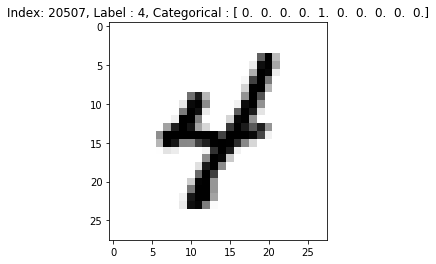

In [29]:
def display_image(id,train_label):
    sample_train = train.iloc[id].values.reshape(image_width,image_height)
    categorical = to_categorical(train_label)
    plt.title('Index: %d, Label : %d, Categorical : %s' %(id,train_label[id],categorical[id]))
    sample_image = plt.imshow(sample_train,cmap='gray_r')
    
display_image(randint(0,train.shape[0]),train_label)

* Creating a placeholder for features and label :

In [30]:
x = tf.placeholder(dtype=tf.float32,shape=[None,784], name='x')
y_ = tf.placeholder(dtype=tf.float32,shape=[None,10], name= 'y_')

* Creating a function to initialize **Weights** with some standard deviation and **Bias** with a constant.

In [31]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

* Creating functions as we are using them multiple times.
> * Defining fuction conv2d having single strides and same padding.
> * Defining fuction max_pool_2x2 having [2x2] strides, same padding and [2x2] window size (Images shrinkes to half)

In [32]:
def conv2d(x, W, s, p):
    return tf.nn.conv2d(x, W, strides=[1,s,s,1], padding=p)

def max_pool(x, f, s, p):
    return tf.nn.max_pool(x, ksize=[1,f,f,1], strides=[1,s,s,1], padding=p)

* Reshaping 784 vector to [28x28] matrix.

In [33]:
x_image = tf.reshape(x, [-1,image_height,image_width,1])

In [34]:
W_conv1 = weight_variable([5,5,1,32])
b_conv1 = bias_variable([32])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1, s=1, p='SAME') + b_conv1)
h_pool1 = max_pool(h_conv1, f=2, s=2, p='SAME')

In [35]:
W_conv2 = weight_variable([5,5,32,64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1,W_conv2, s=1, p='SAME') + b_conv2)
h_pool2 = max_pool(h_conv2, f=2, s=2, p='SAME')

In [36]:
l0=h_pool2.shape[3].value
f1=1; s1=1; p1='SAME'; l1=32
f2=3; s2=1; p2='SAME'; l2=32
f3=5; s3=1; p3='SAME'; l3=32
f4=2; s4=1; p4='SAME'

W1 = weight_variable([f1,f1,l0,l1])
b1 = bias_variable([l1])
W2 = weight_variable([f2,f2,l0,l2])
b2 = bias_variable([l2])
W3 = weight_variable([f3,f3,l0,l3])
b3 = bias_variable([l3])

h1 = tf.nn.relu(conv2d(h_pool2,W1,s1,p1)+b1)
h2 = tf.nn.relu(conv2d(h_pool2,W2,s2,p2)+b2)
h3 = tf.nn.relu(conv2d(h_pool2,W3,s3,p3)+b3)
h4 = max_pool(h_pool2,f4,s4,p4)

h_concat = tf.concat([h1,h2,h3,h4],axis=3)

In [37]:
W_fc1 = weight_variable([7*7*160, 1024])
b_fc1 = bias_variable([1024])

h_concat_flat = tf.reshape(h_concat,[-1,7*7*160])
h_fc1 = tf.nn.relu(tf.matmul(h_concat_flat,W_fc1) + b_fc1)

* Using dropout to avoid overfitting the Neural Network.

In [38]:
keep_prob = tf.placeholder(tf.float32, name='keep_prob')
h_fc1_dropout = tf.nn.dropout(h_fc1, keep_prob)

In [40]:
W_fc2 = weight_variable([1024,10])
b_fc2 = bias_variable([10])

y_conv = tf.nn.softmax(tf.matmul(h_fc1_dropout,W_fc2) + b_fc2, name='y_conv')

* Calculating and optimizing (cost) softmax cross entropy between logits and labels.
* correct_prediction - Generating boolean value based on the comparing predicted and actual labels.
* accuracy - Caluculating mean of correct_prediction

In [41]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y_conv))
optimizer = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32), name='accuracy')

In [42]:
batch_size=1000
epochs=10
with tf.Session() as sess:    
    sess.run(tf.global_variables_initializer())
    epoch_range = trange(epochs, leave=True)
    for i in epoch_range:
        epoch_range.set_description('Epoch : %d' %i)        
        #list_mini = np.random.randint(0,train.shape[0],size=batch_size)
        #if i%100 == 0:
        #    train_accuracy = accuracy.eval(feed_dict={x:train.iloc[list_mini], y_:train_label_categorical[list_mini], keep_prob:1.0})
        #    #validation_accuracy = accuracy.eval(feed_dict={x:val_train, y_:val_train_label_categorical, keep_prob:1.0})
        #    #print('step : %d \t training accuracy : %f \t validation accuracy : %f' %(i,train_accuracy,validation_accuracy))
        #    print('step : %d \t training accuracy : %f' %(i,train_accuracy))
        #sess.run(optimizer,feed_dict={x:train.iloc[list_mini], y_:train_label_categorical[list_mini], keep_prob:0.75})
        batch_range = tqdm_notebook(range(int(train.shape[0]/batch_size)),leave=False)
        for j in batch_range:
            batch_range.set_description('\t Batch : %d' %j)
            sleep(0.001)
            sess.run(optimizer,feed_dict={x:train.iloc[batch_size * j: batch_size *(j+1)], y_:train_label_categorical[batch_size * j: batch_size *(j+1)], keep_prob:0.75})
            train_accuracy = accuracy.eval(feed_dict={x:train.iloc[batch_size * j: batch_size *(j+1)], y_:train_label_categorical[batch_size * j: batch_size *(j+1)], keep_prob:1.0})
            batch_range.set_postfix(Train_accuracy='%f' %train_accuracy)
            
    pred=[]
    for i in range(int(test.shape[0]/batch_size)):
        test_batch_categorical = sess.run(y_conv, feed_dict={x:test[batch_size * i: batch_size *(i+1)], keep_prob: 1.0})
        test_batch_pred = np.argmax(test_batch_categorical, axis=1)
        pred.extend(test_batch_pred)
        
image_id = list(range(1,test.shape[0]+1))

Epoch : 0:   0%|                                        | 0/10 [00:00<?, ?it/s]

A Jupyter Widget

Epoch : 1:  10%|███                            | 1/10 [04:29<40:29, 269.93s/it]

A Jupyter Widget

Epoch : 2:  20%|██████▏                        | 2/10 [08:58<35:52, 269.09s/it]

A Jupyter Widget

Epoch : 3:  30%|█████████▎                     | 3/10 [13:26<31:20, 268.68s/it]

A Jupyter Widget

Epoch : 4:  40%|████████████▍                  | 4/10 [17:52<26:49, 268.22s/it]

A Jupyter Widget

Epoch : 5:  50%|███████████████▌               | 5/10 [22:31<22:31, 270.25s/it]

A Jupyter Widget

Epoch : 6:  60%|██████████████████▌            | 6/10 [27:05<18:03, 271.00s/it]

A Jupyter Widget

Epoch : 7:  70%|█████████████████████▋         | 7/10 [31:42<13:35, 271.84s/it]

A Jupyter Widget

Epoch : 8:  80%|████████████████████████▊      | 8/10 [36:19<09:04, 272.49s/it]

A Jupyter Widget

Epoch : 9:  90%|███████████████████████████▉   | 9/10 [40:58<04:33, 273.15s/it]

A Jupyter Widget

Epoch : 9: 100%|██████████████████████████████| 10/10 [45:26<00:00, 272.63s/it]


* Checking whether mnist test labels are equally distributed.

In [43]:
print('MNIST test lables count : %s' %(Counter(pred)))

MNIST test lables count : Counter({5: 3559, 8: 3510, 2: 3464, 1: 3178, 9: 3072, 7: 2943, 6: 2771, 0: 2759, 4: 2744})


* Displaying random image from test dataset with its predicted label.

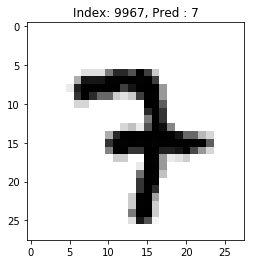

In [44]:
def display_image(id):
    sample_test = test.iloc[id].values.reshape(image_width,image_height)
    plt.title('Index: %d, Pred : %d' %(id,pred[id]))
    sample_image = plt.imshow(sample_test,cmap='gray_r')
    
display_image(randint(0,test.shape[0]))

**3. Creating CSV :**

In [45]:
test_labels = pd.DataFrame({'ImageId':image_id,'Label':pred})
test_labels.to_csv('MNIST_output.csv',index=False)

* Downloading the file.

In [47]:
from IPython.display import HTML
import base64
def create_download_link( df, title = "Download CSV file", filename = "MNIST_output.csv"):  
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(test_labels)
